# DAY 39

## 一、 图像数据的介绍
### 1.1 灰度图像

从这里开始我们进入到了图像数据相关的部分，也是默认你有之前复试班计算机视觉相关的知识，但是一些基础的概念我仍然会提。


昨天我们介绍了minist这个经典的手写数据集，作为图像数据，相较于结构化数据（表格数据）他的特点在于他每个样本的的形状并不是(特征数，)，而是(宽，高，通道数)

In [ ]:
# 先继续之前的代码
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader , Dataset # DataLoader 是 PyTorch 中用于加载数据的工具
from torchvision import datasets, transforms # torchvision 是一个用于计算机视觉的库，datasets 和 transforms 是其中的模块
import matplotlib.pyplot as plt
# 设置随机种子，确保结果可复现
torch.manual_seed(42)

# 1. 数据预处理，该写法非常类似于管道pipeline
# transforms 模块提供了一系列常用的图像预处理操作

# 先归一化，再标准化
transform = transforms.Compose([
    transforms.ToTensor(),  # 转换为张量并归一化到[0,1]
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST数据集的均值和标准差，这个值很出名，所以直接使用
])
import matplotlib.pyplot as plt

# 2. 加载MNIST数据集，如果没有会自动下载
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform=transform
)

Label: 7


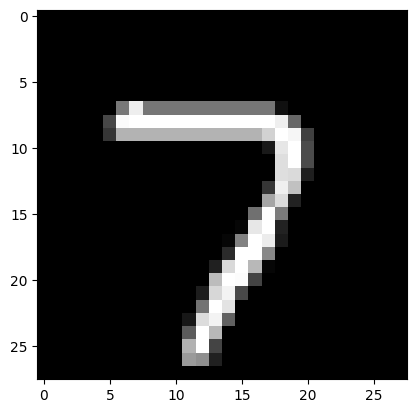

In [22]:
# 随机选择一张图片，可以重复运行，每次都会随机选择
sample_idx = torch.randint(0, len(train_dataset), size=(1,)).item() # 随机选择一张图片的索引
# len(train_dataset) 表示训练集的图片数量；size=(1,)表示返回一个索引；torch.randint() 函数用于生成一个指定范围内的随机数,item() 方法将张量转换为 Python 数字
image, label = train_dataset[sample_idx] # 获取图片和标签
# 可视化原始图像（需要反归一化）
def imshow(img):
    img = img * 0.3081 + 0.1307  # 反标准化
    npimg = img.numpy()
    plt.imshow(npimg[0], cmap='gray') # 显示灰度图像
    plt.show()

print(f"Label: {label}")
imshow(image)

上述是昨天的代码，我们介绍了图像数据的预处理，这是我们首次接触图像数据，他和之前的结构化数据有什么差异点呢？

结构化数据（如表格）的形状通常是 (样本数, 特征数)，例如 (1000, 5) 表示 1000 个样本，每个样本有 5 个特征。图像数据的形状更复杂，需要保留空间信息（高度、宽度、通道），因此不能直接用一维向量表示。其中颜色信息往往是最开始输入数据的通道的含义，因为每个颜色可以用红绿蓝三原色表示，因此一般输入数据的通道数是 3。




  | 维度索引 | 含义                 | 数值说明                  |  
  |----------|----------------------|---------------------------|  
  | `0`      | **通道数（Channels）**| `1` 表示这是一张灰度图（仅有一个颜色通道，如黑白照片）。<br>如果是彩色图（如RGB），通道数为 `3`。 |  
  | `1`      | **高度（Height）**   | `28` 表示图像的垂直像素数为28像素。                     |  
  | `2`      | **宽度（Width）**    | `28` 表示图像的水平像素数为28像素。                     |  

MNIST 数据集是手写数字的 灰度图像，每个像素点的取值范围为 0-255（黑白程度），因此 通道数为 1。图像尺寸统一为 28×28 像素。

In [25]:
# 打印下图片的形状
image.shape

torch.Size([1, 28, 28])

### 1.2 彩色图像

在 PyTorch 中，图像数据的形状通常遵循 (通道数, 高度, 宽度) 的格式（即 Channel First 格式），这与常见的 (高度, 宽度, 通道数)（Channel Last，如 NumPy 数组）不同。---注意顺序关系，

注意点：
1. 如果用matplotlib库来画图，需要转换下顺序，我们后续介绍
2. 模型输入通常需要 批次维度（Batch Size），形状变为 (批次大小, 通道数, 高度, 宽度)。例如，批量输入 10 张 MNIST 图像时，形状为 (10, 1, 28, 28)。


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
图像形状: torch.Size([3, 32, 32])
图像类别: frog


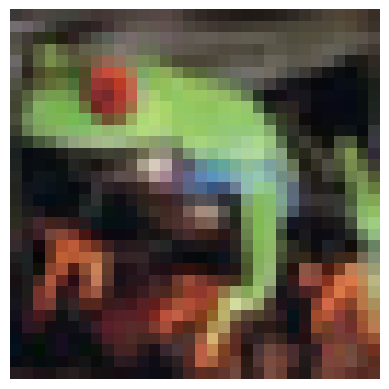

In [27]:
# 打印一张彩色图像，用cifar-10数据集
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 设置随机种子确保结果可复现
torch.manual_seed(42)
# 定义数据预处理步骤
transform = transforms.Compose([
    transforms.ToTensor(),  # 转换为张量并归一化到[0,1]
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 标准化处理
])

# 加载CIFAR-10训练集
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# 创建数据加载器
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True
)

# CIFAR-10的10个类别
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

# 随机选择一张图片
sample_idx = torch.randint(0, len(trainset), size=(1,)).item()
image, label = trainset[sample_idx]

# 打印图片形状
print(f"图像形状: {image.shape}")  # 输出: torch.Size([3, 32, 32])
print(f"图像类别: {classes[label]}")

# 定义图像显示函数（适用于CIFAR-10彩色图像）
def imshow(img):
    img = img / 2 + 0.5  # 反标准化处理，将图像范围从[-1,1]转回[0,1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # 调整维度顺序：(通道,高,宽) → (高,宽,通道)
    plt.axis('off')  # 关闭坐标轴显示
    plt.show()

# 显示图像
imshow(image)

注意，因为这里设计到图像的显示，所以就需要调整维度顺序：(通道,高,宽) → (高,宽,通道)

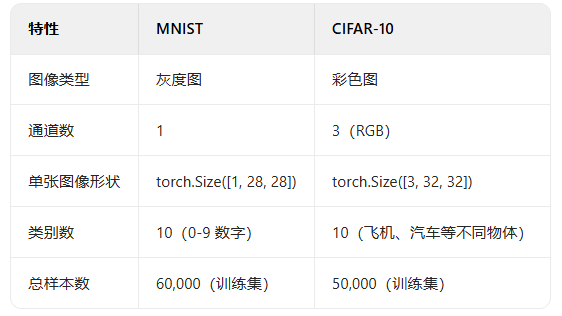

介绍下超参数的优化 优化器

优化手写数字问题 引出cnn

如何计算显存一次性可以读取多少张

随机种子

## 二、 图像相关的神经网络的定义

考虑课程内容的推进，今日的内容只提定义，不涉及训练和测试过程

###  2.1 黑白图像模型的定义

In [ ]:
# 先归一化，再标准化
transform = transforms.Compose([
    transforms.ToTensor(),  # 转换为张量并归一化到[0,1]
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST数据集的均值和标准差，这个值很出名，所以直接使用
])
import matplotlib.pyplot as plt

# 2. 加载MNIST数据集，如果没有会自动下载
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform=transform
)


In [ ]:
# 定义两层MLP神经网络
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()  # 将28x28的图像展平为784维向量
        self.layer1 = nn.Linear(784, 128)  # 第一层：784个输入，128个神经元
        self.relu = nn.ReLU()  # 激活函数
        self.layer2 = nn.Linear(128, 10)  # 第二层：128个输入，10个输出（对应10个数字类别）
        
    def forward(self, x):
        x = self.flatten(x)  # 展平图像
        x = self.layer1(x)   # 第一层线性变换
        x = self.relu(x)     # 应用ReLU激活函数
        x = self.layer2(x)   # 第二层线性变换，输出logits
        return x

# 初始化模型
model = MLP()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)  # 将模型移至GPU（如果可用）

from torchsummary import summary  # 导入torchsummary库
print("\n模型结构信息：")
summary(model, input_size=(1, 28, 28))  # 输入尺寸为MNIST图像尺寸


模型结构信息：
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                   [-1, 10]           1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


我们关注和之前结构化MLP的差异
1. 输入需要展平操作

MLP 的输入层要求输入是一维向量，但 MNIST 图像是二维结构（28×28 像素），形状为 [1, 28, 28]（通道 × 高 × 宽）。nn.Flatten()展平操作 将二维图像 “拉成” 一维向量（784=28×28 个元素），使其符合全连接层的输入格式。

其中不定义这个flatten方法，直接在前向传播的过程中用 x = x.view(-1, 28 * 28) 将图像展平为一维向量也可以实现

2. 输入数据的尺寸包含了通道数input_size=(1, 28, 28)

3. 参数的计算

- 第一层 layer1（全连接层）

权重参数：输入维度 × 输出维度 = 784 × 128 = 100,352

偏置参数：输出维度 = 128

合计：100,352 + 128 = 100,480

- 第二层 layer2（全连接层）

权重参数：输入维度 × 输出维度 = 128 × 10 = 1,280

偏置参数：输出维度 = 10
合计：1,280 + 10 = 1,290

- 总参数：100,480（layer1） + 1,290（layer2） = 101,770

### 2.2 彩色图像模型的定义

In [31]:
class MLP(nn.Module):
    def __init__(self, input_size=3072, hidden_size=128, num_classes=10):
        super(MLP, self).__init__()
        # 展平层：将3×32×32的彩色图像转为一维向量
        # 输入尺寸计算：3通道 × 32高 × 32宽 = 3072
        self.flatten = nn.Flatten()
        
        # 全连接层
        self.fc1 = nn.Linear(input_size, hidden_size)  # 第一层
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  # 输出层
        
    def forward(self, x):
        x = self.flatten(x)  # 展平：[batch, 3, 32, 32] → [batch, 3072]
        x = self.fc1(x)      # 线性变换：[batch, 3072] → [batch, 128]
        x = self.relu(x)     # 激活函数
        x = self.fc2(x)      # 输出层：[batch, 128] → [batch, 10]
        return x

# 初始化模型
model = MLP()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)  # 将模型移至GPU（如果可用）

from torchsummary import summary  # 导入torchsummary库
print("\n模型结构信息：")
summary(model, input_size=(3, 32, 32))  # CIFAR-10 彩色图像（3×32×32）
    


模型结构信息：
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                 [-1, 3072]               0
            Linear-2                  [-1, 128]         393,344
              ReLU-3                  [-1, 128]               0
            Linear-4                   [-1, 10]           1,290
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.03
Params size (MB): 1.51
Estimated Total Size (MB): 1.54
----------------------------------------------------------------


- 第一层 layer1（全连接层）

权重参数：输入维度 × 输出维度 = 3072 × 128 = 393,216

偏置参数：输出维度 = 128

合计：393,216 + 128 = 393,344

- 第二层 layer2（全连接层）

权重参数：输入维度 × 输出维度 = 128 × 10 = 1,280

偏置参数：输出维度 = 10

合计：1,280 + 10 = 1,290

- 总参数：393,344（layer1） + 1,290（layer2） = 394,634

### 2.3 模型定义与batchsize的关系

实际定义中，输入图像还存在batchsize这一维度

在 PyTorch 中，模型定义和输入尺寸的指定不依赖于 batch_size，无论设置多大的 batch_size，模型结构和输入尺寸的写法都是不变的。

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() # nn.Flatten()会将每个样本的图像展平为 784 维向量，但保留 batch 维度。
        self.layer1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.flatten(x)  # 输入：[batch_size, 1, 28, 28] → [batch_size, 784]
        x = self.layer1(x)   # [batch_size, 784] → [batch_size, 128]
        x = self.relu(x)
        x = self.layer2(x)   # [batch_size, 128] → [batch_size, 10]
        return x

PyTorch 模型会自动处理 batch 维度（即第一维），无论 batch_size 是多少，模型的计算逻辑都不变。batch_size 是在数据加载阶段定义的，与模型结构无关。

summary(model, input_size=(1, 28, 28))中的input_size不包含 batch 维度，只需指定样本的形状（通道 × 高 × 宽）。



总结：batch_size与模型定义的关系**
| **组件**         | **是否涉及batch_size**                     | **示例代码**                                   |
|------------------|-------------------------------------------|-----------------------------------------------|
| **模型定义**     | ❌ 完全无关                               | `class MLP(nn.Module)` 中无需提及batch_size   |
| **torchsummary** | ❌ 只需要样本形状（不含batch维度）         | `summary(model, input_size=(1, 28, 28))`      |
| **DataLoader**   | ✅ 在此设置batch_size                      | `DataLoader(dataset, batch_size=64)`          |
| **训练循环**     | ✅ 数据自动以batch形式输入模型             | `for data, target in train_loader: ...`       |


## 三、显存占用的主要组成部分

昨天说到了在面对数据集过大的情况下，由于无法一次性将数据全部加入到显存中，所以采取了分批次加载这种方式。即一次只加载一部分数据，保证在显存的范围内。

那么显存设置多少合适呢？如果设置的太小，那么每个batchsize的训练不足以发挥显卡的能力，浪费计算资源；如果设置的太大，会出现OOT（out of memory）



显存一般被以下内容占用：
1. 模型参数与梯度：模型的权重（Parameters）和对应的梯度（Gradients）会占用显存，尤其是深度神经网络（如 Transformer、ResNet 等），一个 1 亿参数的模型（如 BERT-base），单精度（float32）参数占用约 400MB（1e8×4Byte），加上梯度则翻倍至 800MB（每个权重参数都有其对应的梯度）。

2. 部分优化器（如 Adam）会为每个参数存储动量（Momentum）和平方梯度（Square Gradient），进一步增加显存占用（通常为参数大小的 2-3 倍）

3. 其他开销。

[oom处理方案](https://cloud.tencent.com/developer/article/2519693)


下面以手写数据集为例

In [32]:
from torch.utils.data import DataLoader

# 定义训练集的数据加载器，并指定batch_size
train_loader = DataLoader(
    dataset=train_dataset,  # 加载的数据集
    batch_size=64,          # 每次加载64张图像
    shuffle=True            # 训练时打乱数据顺序
)

# 定义测试集的数据加载器（通常batch_size更大，减少测试时间）
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=1000,
    shuffle=False
)

手写数据集（MNIST）和当前 MLP 模型，显存占用的计算可以简化为以下几个部分。


### 3.1 模型参数与梯度（FP32 精度）
参数总量：101,770 个参数


- **1字节（Byte）= 8位（bit）**，是计算机存储的最小寻址单位。  
- 位（bit）是二进制数的最小单位（0或1），例如`0b1010`表示4位二进制数。
- 1KB=1024字节；1MB=1024KB=1,048,576字节


 **常见数据类型的字节占用**  
   | 数据类型       | 位数（bit） | 字节（Byte） | 数值范围（近似）         |
   |----------------|-------------|--------------|--------------------------|
   | `float32`（单精度浮点数） | 32          | 4            | ±1.7×10^38               |
   | `float64`（双精度浮点数） | 64          | 8            | ±1.8×10^308              |
   | `uint8`（无符号8位整数）  | 8           | 1            | 0~255                    |


 - MNIST数据集的原始图像像素值为**0-255的整数**（uint8类型，占1字节），表示灰度值（0=黑，255=白）。  
 - 但PyTorch的`transforms.ToTensor()`会将其**归一化到[0, 1]范围**，并转换为 `float32`类型（浮点型更适合神经网络计算）。


 **计算示例：单张MNIST图像的显存占用**
1. **原始像素值（uint8，未转换时）**  
   - 尺寸：28×28像素  
   - 单像素占用：1字节（uint8）  
   - 总占用：`28×28×1 = 784字节 ≈ 0.766 KB`  

2. **转换为`float32`张量后**  
   - 尺寸：`1×28×28`（通道×高×宽）  
   - 单像素占用：4字节（float32）  
   - 总占用：`1×28×28×4 = 3136字节 ≈ 3.06 KB`  


单精度（float32）参数占用：101,770 × 4 Byte ≈ 403 KB

梯度是损失函数对模型参数的导数（∂Loss/∂Weight），用于指示参数更新的方向和幅度。梯度是损失函数对模型参数的导数（∂Loss/∂Weight），用于指示参数更新的方向和幅度。因此在默认情况下，梯度的数据类型和数目与参数相同。

梯度占用（反向传播时）：与参数相同，合计约 806 KB


### 3.2 **优化器状态**
####  SGD
- SGD优化器**不存储额外动量**，因此无额外显存占用。  
- SGD 随机梯度下降，最基础的优化器，直接沿梯度反方向更新参数。
- 参数更新公式：w = w - learning_rate * gradient

####  Adam
- Adam优化器：自适应学习率优化器，结合了动量（Momentum）和梯度平方的指数移动平均。  
- 每个参数存储动量（m）和平方梯度（v），占用约 `101,770 × 8 Byte ≈ 806 KB`  
- 动量（m）：每个参数对应一个动量值，数据类型与参数相同（float32），占用 403 KB。
- 梯度平方（v）：每个参数对应一个梯度平方值，数据类型与参数相同（float32），占用 403 KB。


### 3.3 **数据批量（batch_size）的显存占用**
- **单张图像尺寸**：`1×28×28`（通道×高×宽），归一化转换为张量后为`float32`类型  
  - 单张图像显存占用：`1×28×28×4 Byte = 3,136 Byte ≈ 3 KB`  
- **批量数据占用**：`batch_size × 单张图像占用`  
  - 例如：`batch_size=64` 时，数据占用为 `64×3 KB ≈ 192 KB`  
  - `batch_size=1024` 时，数据占用为 `1024×3 KB ≈ 3 MB` 

### 3.4. **前向/反向传播中间变量**
- 对于两层MLP，中间变量（如`layer1`的输出）占用较小：  
  - `batch_size×128`维向量：`batch_size×128×4 Byte = batch_size×512 Byte`  
  - 例如`batch_size=1024`时，中间变量约 `512 KB` 

以SGD为例，此时其他参数占用固定，batchsize会影响显存占用

| batch_size | 数据占用 | 中间变量 | 总显存占用（近似） |
|------------|----------|----------|--------------------|
| 64         | 192 KB   | 32 KB    | ~1 MB              |
| 256        | 768 KB   | 128 KB   | ~1.7 MB            |
| 1024       | 3 MB     | 512 KB   | ~4.5 MB            |
| 4096       | 12 MB    | 2 MB     | ~15 MB             |

在 PyTorch 中，在使用DataLoader加载数据时，如果不指定batch_size参数，默认值是1

，即每次迭代返回一个样本。这与一次性使用全部数据进行训练是完全不同的概念。如果想要一次性使用全部数据进行训练，需要手动将batch_size设置为数据集的大小，但对于大型数据集，这样做通常会导致内存不足，因为一次性将所有数据加载到内存中可能会超出硬件的内存限制。

大规模数据时，通常从16开始测试，然后逐渐增加，确保代码运行正常且不报错，直到出现 内存不足（OOM）报错 或训练效果下降，此时选择略小于该值的 batch_size。

训练时候搭配 nvidia-smi 监控显存占用，合适的 batch_size = 硬件显存允许的最大值 × 0.8（预留安全空间），并通过训练效果验证调整。

补充说明： batchsize对于训练的影响

在深度学习中，使用较大的 batch_size（批量大小）相比单样本训练（batch_size=1）有以下核心优势
- 并行计算能力最大化，减小训练时间；且大幅减少更新次数
- 梯度方向更准确，单样本训练的梯度仅基于单个数据点，可能包含大量噪声（尤其是数据分布不均或存在异常值时）。大 batch_size 的梯度是多个样本的**平均值**，能抵消单个样本的随机性，梯度方向更接近真实分布的 “全局最优方向”。会让训练过程更稳定，波动更小




| **场景**         | **计算过程**                                                                 | **参数更新方式**                     |
|------------------|-----------------------------------------------------------------------------|------------------------------------|
| **batch_size=1**  | 计算1个样本的损失 $ L_1 $ → 反向传播得到梯度 $ g_1 $                   | 直接用 $ g_1 $ 更新参数          |
| **batch_size=12** | 计算12个样本的损失 $ L_1, L_2, ..., L_{12} $ → 分别求梯度 $ g_1, g_2, ..., g_{12} $ → 计算平均梯度 $ \bar{g} = \frac{g_1 + g_2 + ... + g_{12}}{12} $ | 用平均梯度 $ \bar{g} $ 更新参数   |



